# Исследование успешности игр и игровых платформ

В нашем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


**Цели исследования:**

- выявить закономерности, определяющие успешность игры; 
- определить самые популярные платформы для игр и жанры игр;
- влияют ли рейтинги на продажи игр.


**Ход исследования**

Общую информацию мы получим из файла `/datasets/games.csv`. Чтобы понять качество данных, мы сделаем первичный обзор данных.


Проведем предобработку данных: выявим аномалии, обработаем пропуски при необходимости, исправим ошибки.


Проведем исследовательский анализ данных:
- посмотрим сколько игр выпускалось в разные годы;
- изучим как меняли продажи по платформам;
- какие платформы лидируют по продажам, растут или падают;
- построим соотвествующие графики по результатам анализа;
- проверим сформулированные гипотезы.
<br>

В самом конце проекта, напишем общий вывод по проведенном анализу.

## Обзор данных

Ипортируем нужные библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv') # откроем нужный нам файл

Посмотрим общую информацию:

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Описание данных:**


- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Визуализируем с помощью графика процент пропущенных значений в столбцах:

In [5]:
def missing_values(df): # поместим код графика в функцию для компактности
    (
        (df.isna().mean()*100)
        .sort_values().plot(kind= 'barh', figsize=(22,7),fontsize = 17)
        .set_title('Процент пропущенных значений' + "\n", fontsize = 25) 
    )

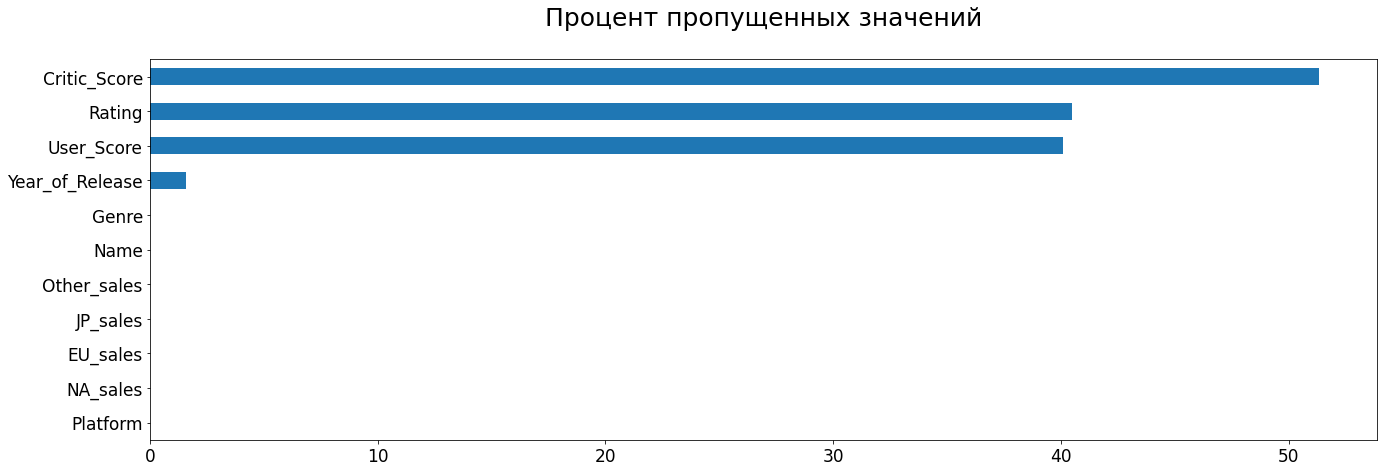

In [6]:
missing_values(df) 

Взглянем на статистические данные по столбцам:

In [7]:
df.describe() 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
df.duplicated().sum() # проверим наличие дубликатов

0

После первичного ознакомления, выявили следующие моменты. 
<br>
В некоторых столбцах пропуски достигают более 40 %. Заполнять их или нет, определим в разделе **"Предобработка данных"**
<br>
Есть необходимость привести название колонок к нижнему регистру для удобства, а так же поменять тип данных в некоторых столбцах.

## Предобработка данных

### Замена названий столбцов

Ещё раз проверим названия колонок:

In [9]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

С помощью функции `map` и метода `str.lower` приведем все названия столбца к нижнему регистру:

In [10]:
df.columns = map(str.lower, df.columns)

In [11]:
df.columns # проверяем

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Отлично. Идем дальше.

### Работа с пропусками и типами данных

Посмотрим какие типы данных у нас встречаются в каждом столбце:

In [12]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [13]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Продажи по всем регионам оставим в том же типе данных, чтобы не исказить общие суммы продаж в дальнейшем.

Посмотрим, где есть пустые значения, которые могут нам помешать поменять тип данных:

In [14]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

В столбцах `name`, `year_of_release` и `genre` ничтожно мало пропусков, поэтому есть предложение удалить данные строки:

In [15]:
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

In [16]:
df.isna().mean() # проверяем

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

В столбце `year_of_release` сделаем замену тип данных в `int`, так как для перевода в формат `to_datetime` у нас нет ни месяца, ни числа и в итоге дата будет некорректной. И в дальнейшем нам будет легче фильтровать данные:

In [17]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [18]:
df.head() # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [19]:
df.dtypes # проверяем, что тип данных поменялся

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Что касается столбцов `critic_score`, `user_score` и `rating`. В столбцах очень много пропусков. Удалить мы их не можем, так как потеряем очень много данных. 

Оценку критиков и пользователей заполнить какими-либо числами мы тоже не можем, так как каждая оценка - это оценка того или иного количества геймеров, и придумывать или подгонять под среднее или медиану будет не совсем корректно, так как даже игры из одного жанра могут значительно отличаться по индивидуальным особенностям.

Что касается рейтинга игр. Рейтингувую систему ESBR используют только на территории США и Канады, поэтому конкретно этот рейтинг в дальнейшем мы можем сопостовлять только с продажами в Северной Америке. В Японии используют рейтинговую систему CERO, в Европе - PEGI.  Поэтому в данном столбце мы заполним пропуски заглушкой `Unknown`, так как выдумывать рейтинг для игр, это не наша работа.

In [20]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [21]:
df['rating'] = df['rating'].fillna('Unknown')

В столбце `critic_score` пустые значения заполним заглушкой и поменяем тип данных на `int`, так как оценка критиков может доходить до 100 баллов, округление не будет иметь большое значение:

In [22]:
df['critic_score'] = df['critic_score'].fillna(-99).astype('int')

In [23]:
df.isna().sum() # проверяем

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating                0
dtype: int64

Проверим отдельно столбец `user_score`, так как судя по типу данных, у нас есть в нем строковые значения:

In [24]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
1.9       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Как мы видим, есть некое значение `tbd`. В игровом мире оно расшифровывается как - *To Be Determined* или *To Be Done*, что означает, чаще всего, следующее: разработчик пока не определился с датой выхода и не может её назвать, поэтому в графе "Дата выхода" стоит данная абревиатура.

То есть, данные игры могут в прицнипе не выйти в массовое пользование по какой-либо причине, даже если они уже были на оценке у каких-либо критиков, что в игровой сфере обычное явление. Поэтому все пропуски заполним заглушками, в том числе и значения `tbd`. 

Тип данных поменяем на `float`, так как у пользователей всего лишь 10-бальная система оценки, которая получается по среднему между всеми оцененными критериями игры.

In [25]:
df['user_score'] = df['user_score'].fillna(-99) # заменяем пустые значение заглушкой

In [26]:
df.loc[df.user_score == 'tbd', 'user_score'] = - 99 # заменяем значения 'tbd' заглушкой

In [27]:
df['user_score'] = df['user_score'].astype('float') # меняем тип данных

In [28]:
df.isna().sum() # проверяем

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Создадим столбцец `total_sales` в котором посчитаем суммарные продажи во всех регионах по каждой игре:

In [29]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [30]:
df.head() # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99,-99.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99,-99.0,Unknown,31.38


Мы провели работу с пропусками, привели название столбцов к нижнему регистру и преобразовали данные в нужные нам типы данных. Далее перейдем к **Исследовательскому анализу**.

## Исследовательзкий анализ данных

### Сколько игр выпускалось в разные годы

Посмотрим сколько игр выпускалось в разные годы. Произведем группировку по годам и количеству выпущенных игр и покажем всё это на графике:

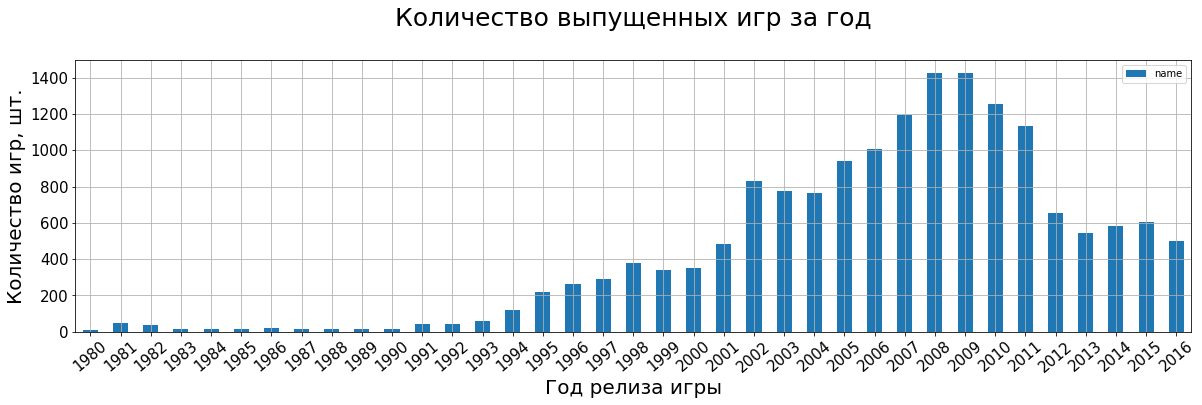

In [32]:
ax = df.groupby('year_of_release').agg(
    {'name': 'count'}
    ).plot(kind='bar', 
       figsize=(20,5), 
       fontsize=15, grid=True, rot=40,
       title='Количество выпущенных игр за год' +"\n"
      )
ax.title.set_size(25)
plt.ylabel('Количество игр, шт.', size=20)
plt.xlabel('Год релиза игры', size=20);
# создадим визуализацию данных

График нам наглядно показывает, что самое большое количество игр пришлось на 2008-2009 годы. До 1995 года возможно выходили хитовые игры, но с точки зрения анализа они принесут нам мало пользы, так как их выпускалось ничтожно малое количество (меньше 100 в год).

### Платформы с наибольшими суммарными продажами

Сгруппируем платформы по общему колиству продаж игр и покажем это на графике:

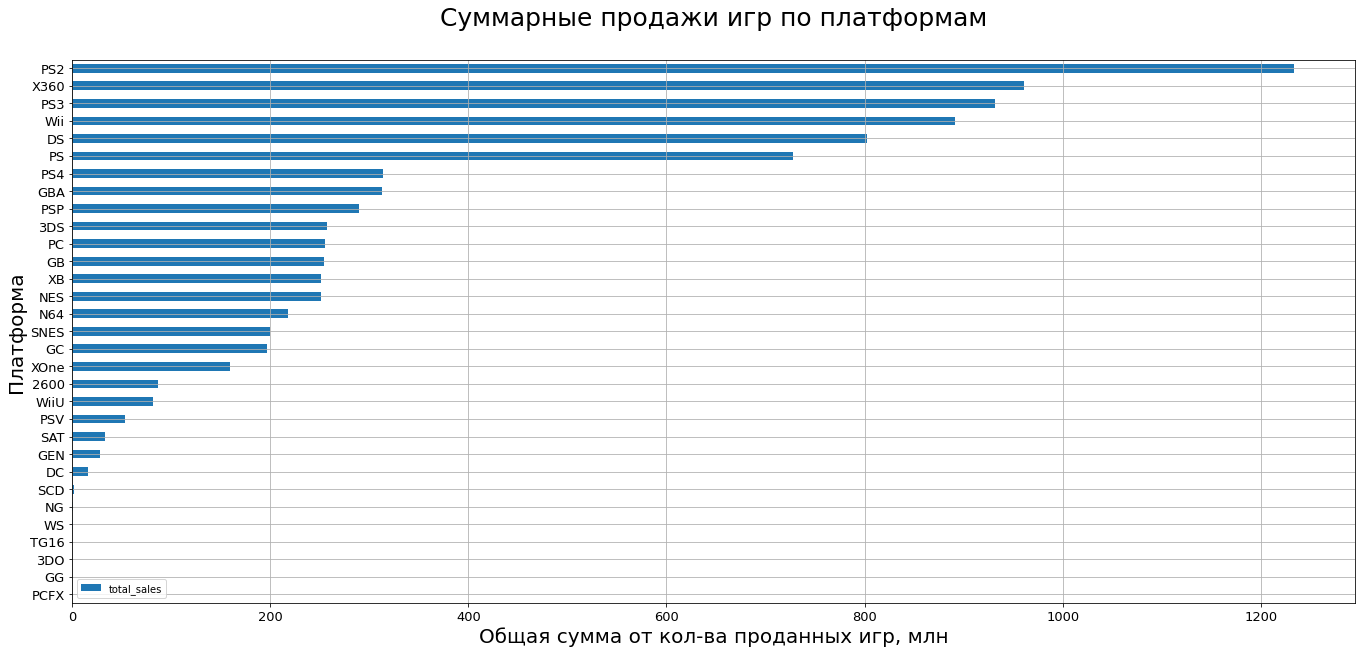

In [33]:
ax = df.groupby('platform').agg(
    {'total_sales': 'sum'}
    ).sort_values(by='total_sales').plot(kind='barh', 
    figsize=(23,10), fontsize=13, grid=True,
    title='Суммарные продажи игр по платформам' +"\n"
    )
ax.title.set_size(25)
plt.ylabel('Платформа', size=20)
plt.xlabel('Общая сумма от кол-ва проданных игр, млн', size=20);

Изучив график, видим что на 2016 год большинство игр было продано на следующие платформы (по возрастанию) - *PS*, *DS*, *PS3*, *Wii*, *X360*, *PS2*. Общие продажи игр по каждой плафторме перевалили за 650 млн, в первой тройке - даже за 900 млн. Все же остальные не дошли и до 400 млн.

Распределим по годам самые популярные платформы и покажем это все на графике. По графику мы сможем определить в какие годы была популярна консоль и какой цикл жизни у каждой консоли (топ-6):

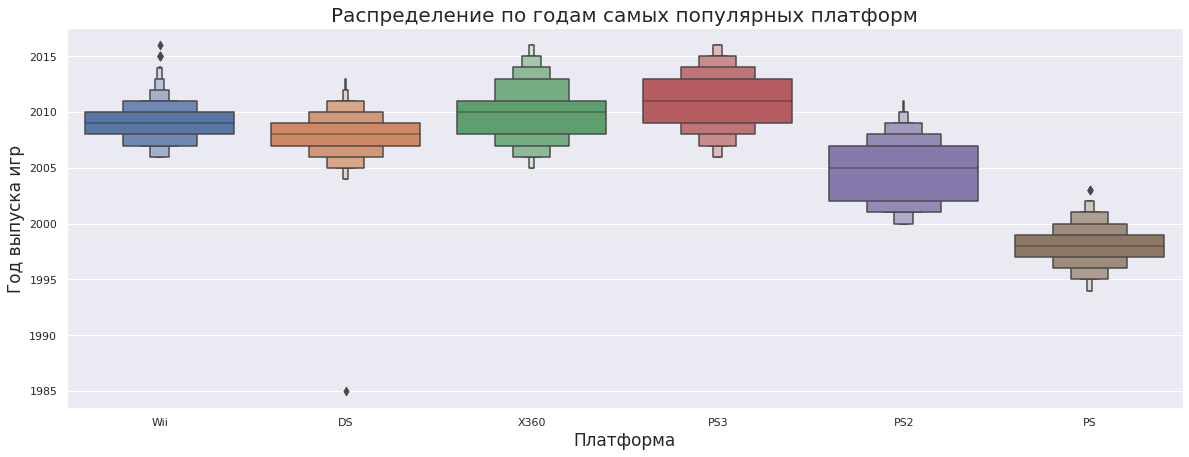

In [34]:
sns.set() # установка темы seaborn
plt.figure(figsize=(20,7)) # установка размера графика
sns.boxenplot(x=df.query('platform == ["PS", "DS", "PS3", "Wii", "X360", "PS2"]')['platform'], 
              y=df['year_of_release']) # задаем вид графика и передаем аргументы

plt.title('Распределение по годам самых популярных платформ', size=20) 
plt.xlabel('Платформа',size=17) 
plt.ylabel('Год выпуска игр',size=17) 
plt.show()

На графике мы заметили аномалию у платформы DS. Платформа Nintendo DS выпустилась в 2004 году, и конечно никаких игр в 1985 году быть не могло. Посмотрим, что это за игра:

In [35]:
df.loc[(df.platform == 'DS') & (df.year_of_release < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-99,-99.0,Unknown,0.02


Данная игра выпускалась в 2010 году в Японии (из внешних источников). Вернем её на своё положенное место, в 2010 год:

In [36]:
df.loc[15704, 'year_of_release'] = 2010 # исправляем аномалию путем замены значения на правильное

Повторно посмотрим график:

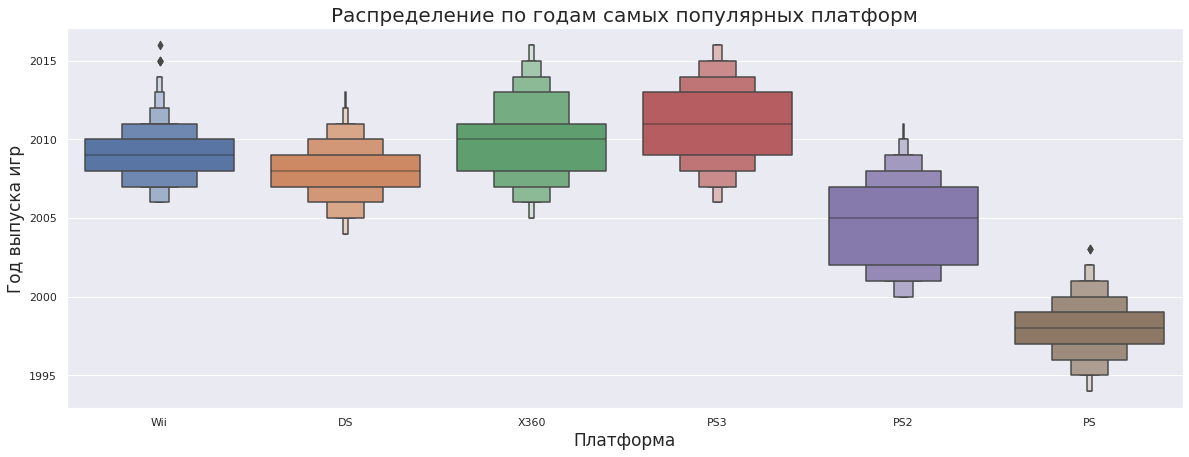

In [37]:
sns.set() # установка темы seaborn
plt.figure(figsize=(20,7)) # установка размера графика
sns.boxenplot(x=df.query('platform == ["PS", "DS", "PS3", "Wii", "X360", "PS2"]')['platform'], 
              y=df['year_of_release']) # задаем вид графика и передаем аргументы

plt.title('Распределение по годам самых популярных платформ', size=20) 
plt.xlabel('Платформа',size=17) 
plt.ylabel('Год выпуска игр',size=17) 
plt.show()

Ознакомившись с графиком, можем смело сказать, на  примере популярных платформ, что их полный жизненный цикл длится примерно 8-10 лет. Если брать именно период популярности, без периода начала и конца цикла жизни платформ, то этот период составляет примерно 5-6 лет.

Так же, можем заметить на примере консолей PlayStation, что платформа, жизненный цикл которой подходит к концу, тут же уступает место следующей модели, что не дает заскучать геймерам.

### Актуальный период с потенциально прибыльными платформами

Отфильтруем данные за актуальный период, который будем в дальнейшем анализировать. Разумным будет взять данные, которым не более 3 лет, чтобы анализировать на основе актуальных игровых платформ, а не тех, которые уже закончили свой жизненный цикл.

In [38]:
actual_period = df.query('year_of_release >= 2014').reset_index(drop=True).copy()

In [39]:
actual_period.info() # ознакомимся

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   int64  
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 158.5+ KB


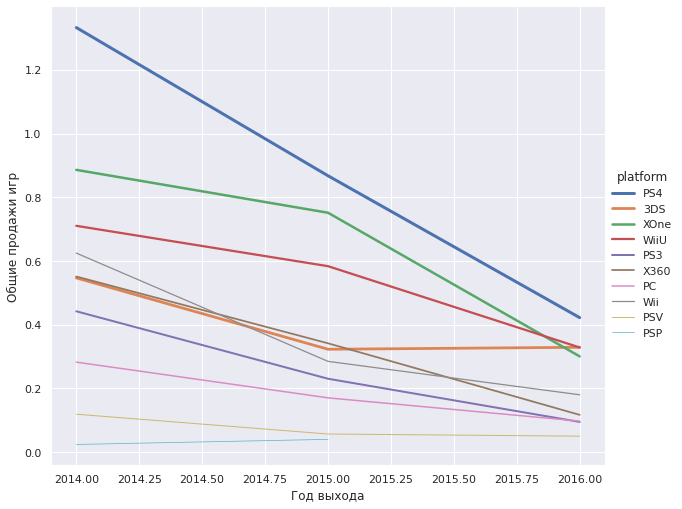

In [40]:
ax = sns.relplot(data=actual_period,
            x='year_of_release', y='total_sales', 
            kind='line', hue='platform', 
            ci=None, size='platform', aspect=1.2, height=7)
ax.set_axis_labels('Год выхода', 'Общие продажи игр');

Изучив график, мы видим, что вцелом, вся игровая индустрия домашних консолей, портативных консолей и игровых компьютеров испытывала спад. Этому есть разумное объяснение. В нашем датасете не учтен ещё один вид платформы - это Мобильный гейминг.

Из внешних источников можно узнать, что уже в 2008-2010 годах в игровой мир активно ворвались Мобильные игры (смартфоны, планшеты). По оценкам, в 2016 году рынок мобильных видеоигр получил выручку в 38 миллиардов долларов по сравнению с 6 миллиардами долларов для рынка консолей и 33 миллиардами долларов для игр на персональных компьютерах. Это основная причина спада продаж консольного и PC-гейминга.

Основываясь на актуальных данных, которые мы имеем на графике, видим, что по состоянию на 2016 год по продажам игр можем выделить Топ-4 потенциально прибыльных платформ: *PS4*, *3DS*, *WiiU* и *XOne*. 

Если брать так называемые Nextgen платформы на 2016 год, то это относится только к *PS4* и *XOne*. Обе платформы вышли позже остальных и данные компании известны тем, что задают тренды в игровой индустрии. *3DS* и *WiiU* относятся к портативным платформам и на 2016 год они лидеры в своем сегменте.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по актуальным платформам:

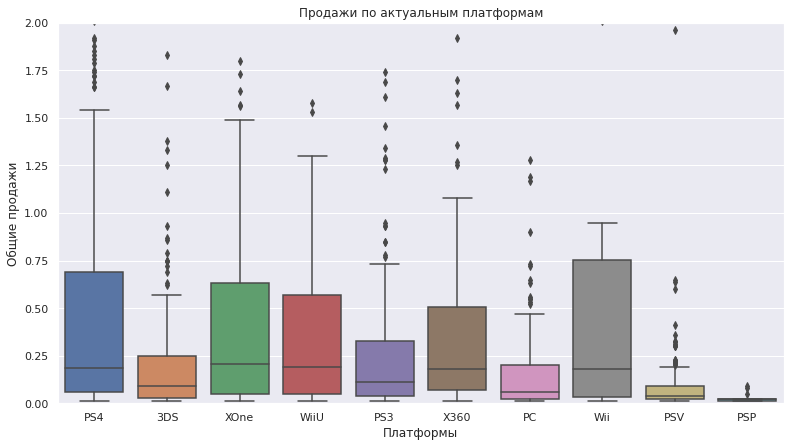

In [41]:
plt.figure(figsize=(13,7))
(sns.boxplot(data=actual_period, y='total_sales', x='platform')
    .set(
    title='Продажи по актуальным платформам', xlabel='Платформы', ylabel='Общие продажи', ylim=(0,2)))
plt.show()           

In [42]:
actual_period.groupby('platform')['total_sales'].agg(['describe'])

describe                                                        
            count      mean       std   min     25%    50%     75%    max
platform                                                                 
3DS         212.0  0.408868  1.188368  0.01  0.0300  0.090  0.2500  11.68
PC          151.0  0.179139  0.329359  0.01  0.0200  0.060  0.2000   3.05
PS3         219.0  0.311324  0.633059  0.01  0.0400  0.110  0.3250   5.27
PS4         376.0  0.766356  1.614969  0.01  0.0575  0.185  0.6900  14.63
PSP          13.0  0.027692  0.027735  0.01  0.0100  0.020  0.0200   0.09
PSV         295.0  0.075932  0.141591  0.01  0.0200  0.040  0.0900   1.96
Wii          11.0  0.460909  0.625451  0.01  0.0350  0.180  0.7550   2.01
WiiU         73.0  0.588767  1.161467  0.01  0.0500  0.190  0.5700   7.09
X360        111.0  0.434414  0.628967  0.01  0.0700  0.180  0.5050   4.28
XOne        228.0  0.615614  1.046513  0.01  0.0500  0.205  0.6325   7.39

Создадим график "ящика с усами" так же за весь период игровой индустрии для анализа на предмет наличия выбросов:

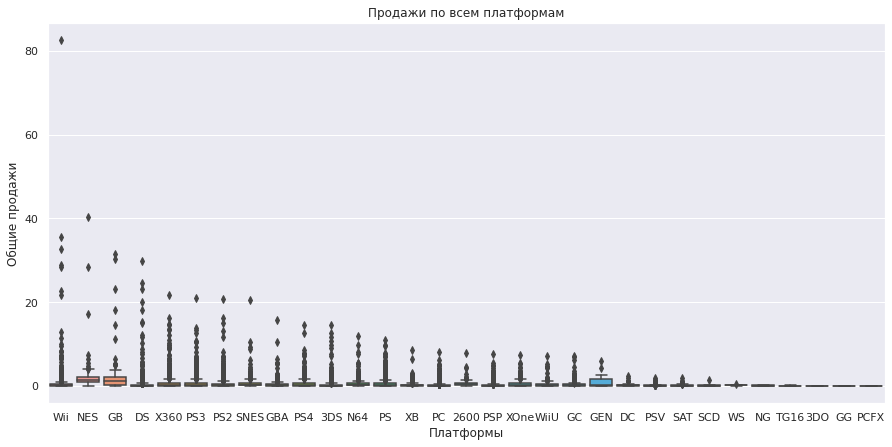

In [43]:
plt.figure(figsize=(15,7))
(sns.boxplot(data=df, y='total_sales', x='platform')
    .set(
    title='Продажи по всем платформам', xlabel='Платформы', ylabel='Общие продажи'))
plt.show()           

Остановимся на двух выбросах у Wii и NES (хотя он не такой большой, но это ближайший максимальный выброс к значению от Wii). Изучим подробнее, к каким играм они относятся:

In [44]:
df[(df.platform == 'Wii') & (df.total_sales > 40)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54


Wii Sports 2006 года выпуска на платформе Wii. Игра действительно собрала такую большую кассу, множество наград и стала популярна во всем мире (источник - https://en.wikipedia.org/wiki/Wii_Sports). С точки зрения ящика с усами, это значение сильно выбивается из общего, но это значение реальное, поэтому убирать его из общей совокупности мы не будем.

In [45]:
df[(df.platform == 'NES') & (df.total_sales > 40)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99,-99.0,Unknown,40.24


Super Mario Bros. 1985 года выпуска на платформе NES. Та же история, игра была мегапопулярна (источник - https://en.wikipedia.org/wiki/Super_Mario_Bros.). В свое время (в 2000 году) даже была включена в "Книгу рекордов Гиннеса" за то, что превысила отметку продаж в 40 млн. копий. И, как мы видим, многие игры до сих пор не достигли этой отметки. Эти данные реальны, поэтому избавляться от них мы не будем.

**Выводы**

На основе полученной инофрмации, на основе графиков, получаем следующие выводы.

Первое, что мы можем заметить проанализировав данные, что среднее фактически всегда больше медианы. Это связано с тем, что большую кассу собирают именно хиты, выпущенные на той или иной платформе, поэтому выбросы, которые мы наблюдаем, в данной сфере - обычное дело и избавляться от них некорректно.

Из платформ предыдущего поколения, более стабильно и успешно себя за этот период показывает *X360*. Его прямой конкурент в том поколении - *PS3*, который славился своими эксклюзивами, но мультиплатформенные игры у *X360* всегда работали стабильнее и лучше, так как железо было гораздо более дружелюбнее к разработчикам.

Ну и конечно, мы уже можем увидеть как выделяются потенциально прибыльные платформы Nextgen - *PS4* и *XOne*, которые набрали обороты, и уже могут претендовать на место первенства в данном периоде. На момент 2016 года у этих платформ одни из самых высоких продаж по играм, и нет причин к тому, что они снизятся по отношению к другим платформам, так как эти игровые платформы самые свежие с запасом в 3-4 года по актуальности.

Что касается портативных консолей, лидеры в данном периоде - *3DS* и *WiiU* от Nintendo. И на этот период они до сих пор пользуются спросом, потому что каких-то более успешных альтернатив нет. Портативная платформа *PSV* от Sony была очень перспективной платформой, гораздо более технологичной, чем вышеуказанные портативки от Nintendo и вышла с ними в одно и то же время. Но, из внешних источников можем узнать, что политика компании Sony была ориентирована на "большие" консоли, поэтому *PSV* провалилась в мировых продажах из-за прекращения нужной поддержки, так и не реализовав свой потенциал. *PSP* в данный период уже заканчивала свой жизненный цикл, поэтому данных о ней не так много в актуальном периоде.

### Влияние отзывов на продажи

Посмотрим, как влияют на продажи внутри популярных платформ оценки пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между оценками и продажами. Сделаем эту манипуляцию церез цикл *for*:

'Связь между оценками геймеров и общих продаж по платформе PS4'

,user_score,total_sales
user_score,1.000000,-0.040132
total_sales,-0.040132,1.000000


'Связь между оценками критиков и общих продаж по платформе PS4'

,critic_score,total_sales
critic_score,1.000000,0.402661
total_sales,0.402661,1.000000


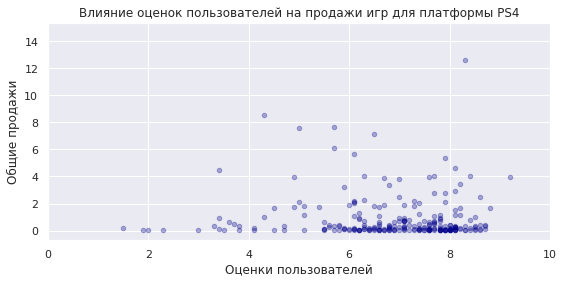

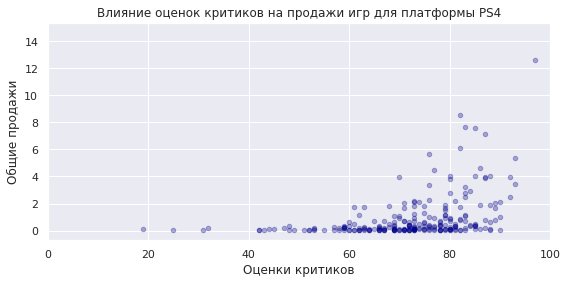

'Связь между оценками геймеров и общих продаж по платформе XOne'

,user_score,total_sales
user_score,1.000000,-0.070384
total_sales,-0.070384,1.000000


'Связь между оценками критиков и общих продаж по платформе XOne'

,critic_score,total_sales
critic_score,1.000000,0.428677
total_sales,0.428677,1.000000


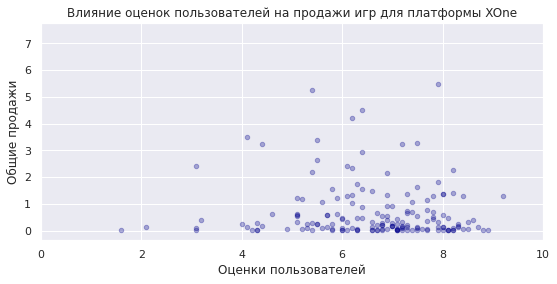

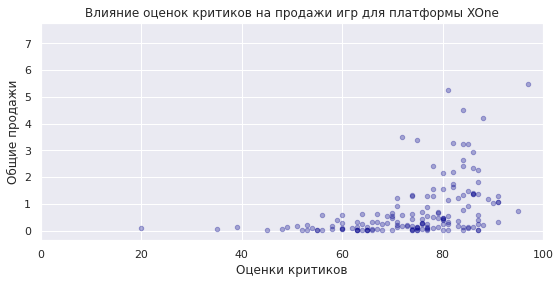

'Связь между оценками геймеров и общих продаж по платформе 3DS'

,user_score,total_sales
user_score,1.000000,0.215193
total_sales,0.215193,1.000000


'Связь между оценками критиков и общих продаж по платформе 3DS'

,critic_score,total_sales
critic_score,1.000000,0.314117
total_sales,0.314117,1.000000


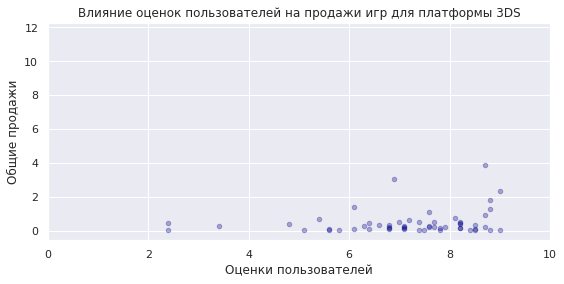

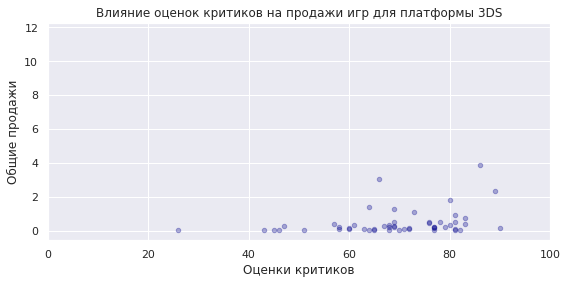

'Связь между оценками геймеров и общих продаж по платформе WiiU'

,user_score,total_sales
user_score,1.000000,0.407926
total_sales,0.407926,1.000000


'Связь между оценками критиков и общих продаж по платформе WiiU'

,critic_score,total_sales
critic_score,1.000000,0.370201
total_sales,0.370201,1.000000


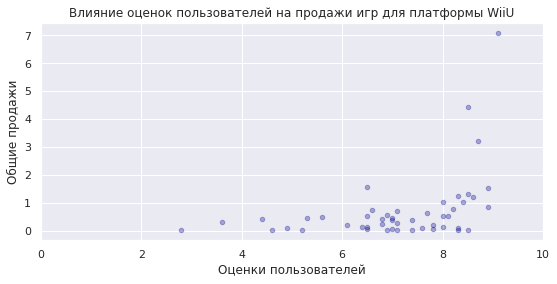

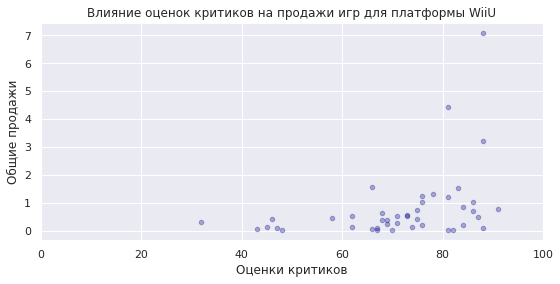

'Связь между оценками геймеров и общих продаж по платформе PS3'

,user_score,total_sales
user_score,1.000000,-0.166761
total_sales,-0.166761,1.000000


'Связь между оценками критиков и общих продаж по платформе PS3'

,critic_score,total_sales
critic_score,1.000000,0.446575
total_sales,0.446575,1.000000


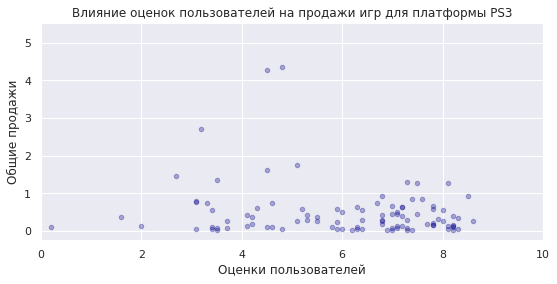

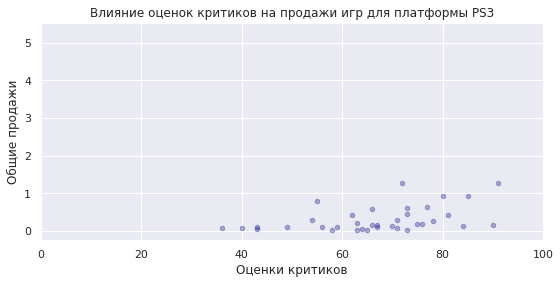

'Связь между оценками геймеров и общих продаж по платформе X360'

,user_score,total_sales
user_score,1.000000,-0.138445
total_sales,-0.138445,1.000000


'Связь между оценками критиков и общих продаж по платформе X360'

,critic_score,total_sales
critic_score,1.000000,0.525723
total_sales,0.525723,1.000000


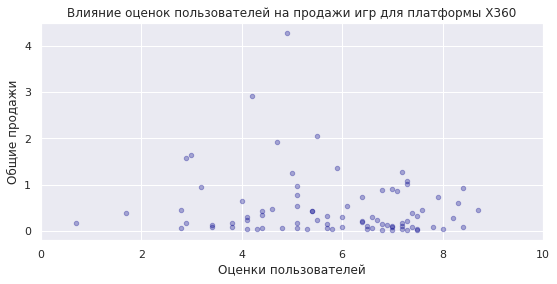

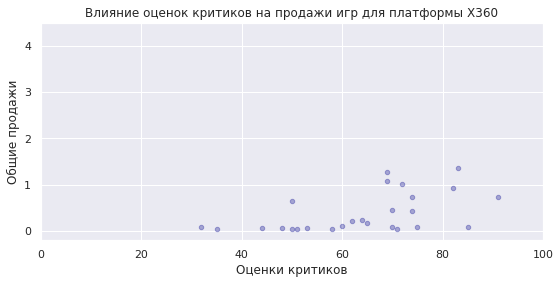

In [46]:
top_platform = ['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360'] # список популярных платформ

# корелляция
for i in top_platform:
    user_cor = actual_period[(actual_period.platform == i) & (actual_period.user_score > 0)
    ][['user_score', 'total_sales']].corr()
    
    critic_cor =  actual_period[(actual_period.platform == i) & (actual_period.critic_score > 0)
    ][['critic_score', 'total_sales']].corr()

# отзывы геймеров
    user_graf = actual_period[actual_period.platform == i].plot.scatter(x='user_score', 
                      y='total_sales',
                      c='DarkBlue',
                        figsize=(9,4),
                        xlim=(0,10),
                        alpha=0.3,
                           xlabel='Оценки пользователей',
                           ylabel='Общие продажи',
                           title= f'Влияние оценок пользователей на продажи игр для платформы {i}')
    


# отзывы игроков
    critic_graf = actual_period[actual_period.platform == i].plot.scatter(x='critic_score',
                      y='total_sales',
                      c='DarkBlue',
                       figsize=(9,4),
                        xlim=(0,100),
                        alpha=0.3,
                           xlabel='Оценки критиков',
                           ylabel='Общие продажи',
                           title= f'Влияние оценок критиков на продажи игр для платформы {i}')
   
    user_graf,
    critic_graf,
    display(f'Связь между оценками геймеров и общих продаж по платформе {i}', user_cor,
            f'Связь между оценками критиков и общих продаж по платформе {i}', critic_cor)
    plt.show()

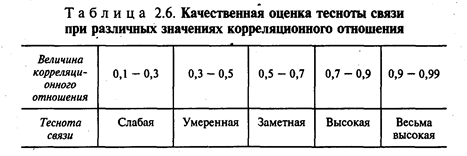

Проведя данный анализ, можем заметить, что минимальная связь между оценками критиков и общими продажами всё-таки есть (на уровне 0,3 - 0,5) по всем платформам. А вот связи между оценками геймеров и общими продажами в Европе и Америке, фактически, нет. Есть исключение в виде платформы *WiiU*, но, это мы обсудим чуть ниже. Критики явно имеют больший вес.

Если сравнить портативные платформы *WiiU* и *3DS* с остальными платформами, то там влияние геймеров на продажи чуть больше, местами даже, чем у критиков. В то время как на "большие" платформы это влияние фактически нулевое. Объясняется это тем, что данные портативки очень популярны в Японии. Фактически, оценки играм ставят обычные граждане и окончательное решение *CERO* (*японская гос. организация, занимающаяся присуждением рейтингов*) принимает опираясь на их отзывы. (из внешних источников)

Далее посмотрим на общее распределение игр по жанрам. Узнаем, выделяются ли жанры с высокими и низкими продажами.

In [47]:
round((actual_period['genre'].value_counts(normalize=True)*100).to_frame('%'), 2)

,%
Action,36.65
Role-Playing,13.08
Adventure,10.95
Sports,9.53
Shooter,7.58
Misc,6.69
Racing,4.09
Fighting,3.55
Simulation,2.61
Platform,2.25


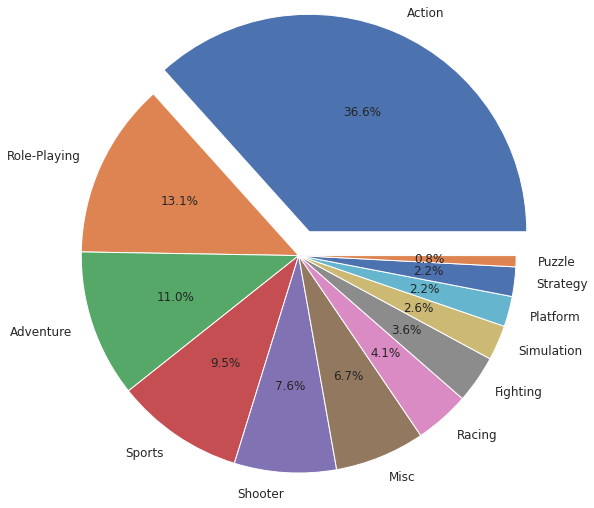

In [48]:
actual_period['genre'].value_counts(normalize=True).plot.pie(radius=2.5, ylabel='',
                                                             autopct='%1.1f%%', 
                                                             fontsize=12,
                                                            explode=(0.3,0,0,0,0,0,0,0,0,0,0,0));

Видим, что львиную долю всех жанров занимает *Action*. 

С помощью медианного значения и графиков посмотрим самые продаваемые жанры, которые стабильно приносят прибыль:

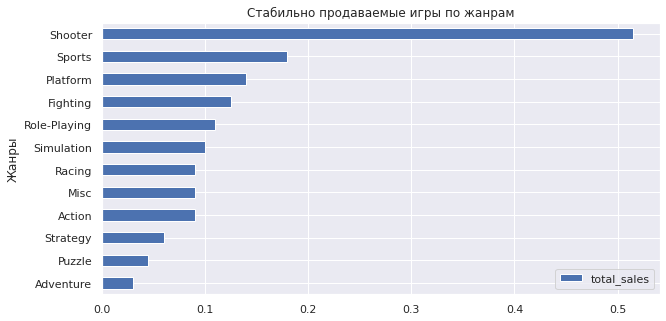

In [49]:
actual_period.groupby('genre')[['total_sales']].median().sort_values(
    by='total_sales').plot(kind='barh', figsize=(10,5),
      xlabel='Жанры', title='Стабильно продаваемые игры по жанрам');

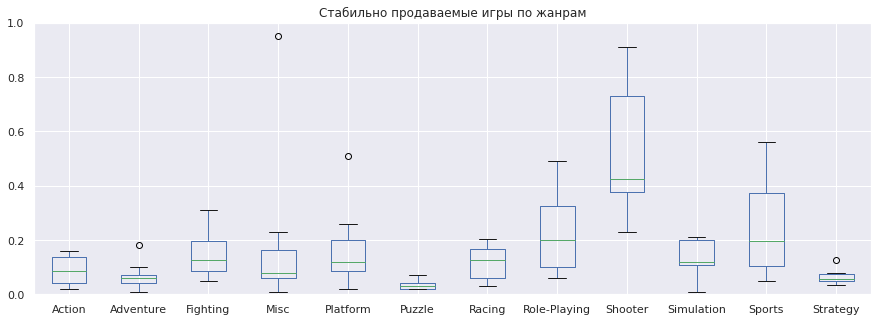

In [50]:
actual_period.pivot_table(index='platform', 
                          columns='genre',
                          values='total_sales', 
                          aggfunc='median').plot(kind='box', 
                                                 figsize=(15,5), 
                                                 ylim=(0,1),
                                                title='Стабильно продаваемые игры по жанрам');

Изучив графики, можем сказать, что самый стабильно прибыльный жанр за актуальный период это - *Shooter*, который идет с очень большим отрывом от остальных. Ближайжие к нему идут *Role-Playing*, *Sports*, *Platform* и *Fighting*. 

Как мы видим, большое количество выпускаемых игр определенного жанра ещё не говорит об их стабильном успехе (жанр *Action*).

### Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) топ-5 самых популярных платформ. Создадим функцию:

In [51]:
def pop_platform (reg):
     
    t = actual_period.groupby('platform')[[reg]].sum().sort_values(by=reg, ascending=False)[5:]
    # отфильтровали все, что идет после топ-5
    top_5_plat = actual_period.groupby('platform')[[reg]].sum().sort_values(
        by=reg, ascending=False)[:5].reset_index() 
    # создали табличку с топ-5 игровых платформ
        
    others = {'platform': 'others_platform', reg: t[reg].sum()} 
    # написали код строки, которую будем добавлять в таблицу top_5_plat, с посчитанным значением оставших платформ вне топа
    top_5_plat = top_5_plat.append(others, ignore_index=True).set_index('platform')
    # добавляем нашу строку в таблицу, и делаем индексами названия игровых платформ
    # для корректного отображения на графике 'pie'
    
    top_5_plat.plot.pie(radius=1.5, y=reg, legend=False, # пишем код графика с нужными для нас визуальными правками
                    autopct='%1.1f%%', explode=(0.1,0.1,0.1,0.1,0.1,0.1))
    
    plt.title(reg +'\n'*3, size=15)
    plt.ylabel(None)
    plt.show()

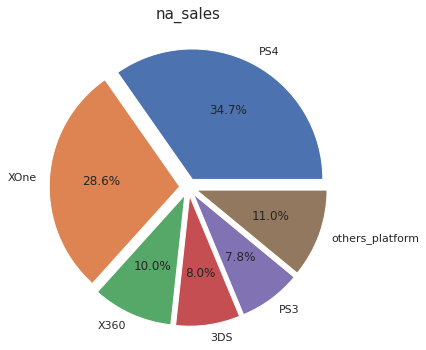

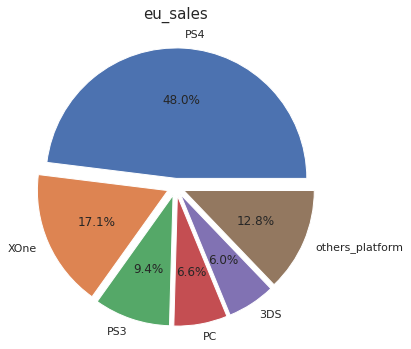

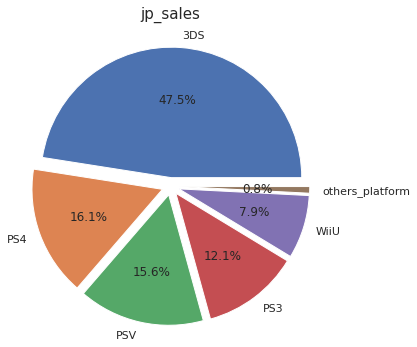

In [52]:
pop_platform('na_sales')
pop_platform('eu_sales')
pop_platform('jp_sales')

Топ-5 в каждом отдельном регионе по платформам получился следующим:

- **Северная Америка**
1. PS4
2. XOne
3. X360
4. 3DS
5. PS3

- **Европа**
1. PS4
2. XOne
3. PS3
4. PC
5. 3DS

- **Япония**
1. 3DS
2. PS4
3. PSV
4. PS3
5. WiiU

Как видим, в Северной Америке и Европе уже активно играют в консоли нового поколения *PS4* и *XOne* во взятый нами период. SONY всегда обладали достаточно мощной рекламной компанией и пиарили свой (без сомнения, качественный) продукт на весь мир. Поэтому неудивительно, что продажи игр на их платформу достаточно неплохо опережают *XOne*, особенно в Европе, где всегда были популярнее именно японские платформы.

Ну и конечно, в Японии традиционно весь топ-5 заполнили японские платформы. Более того, 3 места этого топа заняли портативные консоли, одна из которых на первом месте - *3DS*. Даже провалившаяся в мировых продажах *PSV* была успешна в Японии долгое время, так как на внутреннем рынке японские разработчики продолжали выпускать на неё любимый японцами жанр - *JRPG*, тем самым поддерживая популярность *PSV* внутри японского рынка.

Определим самые популярные жанры (топ-5):

In [53]:
def pop_genre (reg):
    t = actual_period.groupby('genre')[[reg]].sum().sort_values(by=reg, ascending=False)[5:]
    # отфильтровали все, что идет после топ-5
    top_5_genres = actual_period.groupby('genre')[[reg]].sum().sort_values(
        by=reg, ascending=False)[:5].reset_index() 
    # создали табличку с топ-5 игровых жанров
        
    others = {'genre': 'others_genres', reg: t[reg].sum()} 
    # написали код строки, которую будем добавлять в таблицу top_5_genres, с посчитанным значением оставших жанров вне топа
    top_5_genres = top_5_genres.append(others, ignore_index=True).set_index('genre')
    # добавляем нашу строку в таблицу, и делаем индексами названия игровых жанров
    # для корректного отображения на графике 'pie'
    
    top_5_genres.plot.pie(radius=1.5, y=reg, legend=False, # пишем код графика с нужными для нас визуальными правками
                    autopct='%1.1f%%', explode=(0.1,0.1,0.1,0.1,0.1,0.1))
    
    plt.title(reg +'\n'*3, size=15)
    plt.ylabel(None)
    plt.show()

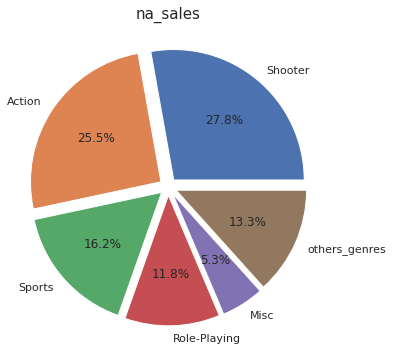

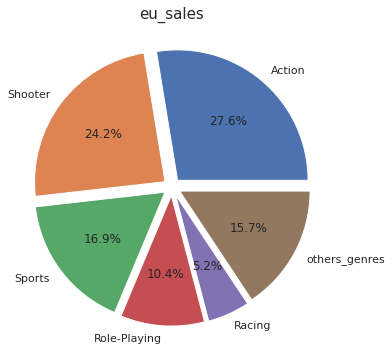

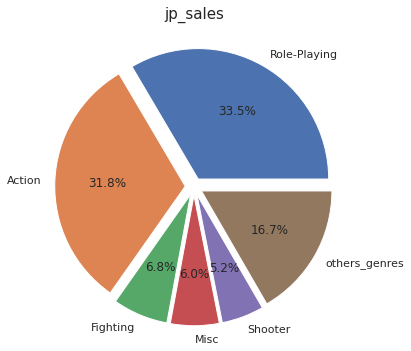

In [54]:
pop_genre('na_sales')
pop_genre('eu_sales')
pop_genre('jp_sales')

Топ-5 в каждом отдельном регионе по жанрам получился следующим:

- **Северная Америка**
1. Shooter
2. Action
3. Sports
4. Role-Playing
5. Misc

- **Европа**
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

- **Япония**
1. Role-Playing
2. Action
3. Fighting
4. Misc
5. Shooter

В целом, картина по предпочтениям жанров американцев и европейцев похожа. Отличия минимальны. Популярные жанры *Action* и *Shooter*, то, на что есть спрос у геймеров. Это, вцелом, отражает геймерскую картину спроса во всем мире.

Но Япония - это очень своебразная страна и культура. И нет никакого удивления, что там первое место среди всех жанров занимают ролевые игры, а именно японские ролевые игры (*JRPG*), которые там безумно популярны, а так же известны во всем мире. *JRPG* можно смело выделить как отдельный жанр. Выше мы выяснили, что в Японии популярнее всего портативные консоли. Именно на них в огромном количестве выпускают *JRPG*, которые в большом количестве разрабатываются исключительно для внутреннего рынка. Поэтому там очень долго остается "вживых" та же *PSV*, которая провалилась в мировых продажах.




Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе? Напомним, что данный рейтинг действует только на территории Канады и США, но, тем не менее, можем на его основе сравнить отдельные регионы. Распишем, что вообще означает данный рейтинг:

- **EC** - для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.
- **E**	- подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто танцуй, FIFA.
- **E10+** - подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- **T** - подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- **M** - подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Так же может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
- **AO** - подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Так же может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.
- **RP** - категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.






In [55]:
def rating_pop (reg):
    actual_period.pivot_table(index='rating', # создадим сводную таблицу для корректного отображения на графике
                          values=reg, 
                          aggfunc='sum').sort_values(by=reg, ascending=False).plot.pie(radius=1.3, legend=False, 
                                                  y=reg,
                                                  autopct='%1.1f%%',
                                                explode=(0.1,0,0,0,0))

    plt.title(reg +'\n'*3, size=15)
    plt.ylabel(None)
    plt.show()

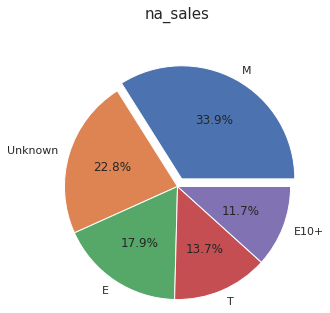

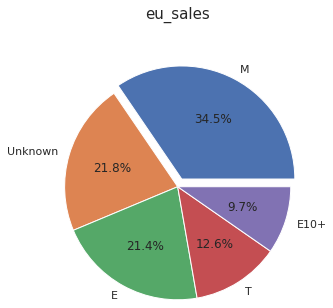

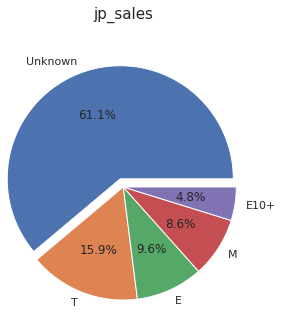

In [56]:
rating_pop('na_sales')
rating_pop('eu_sales')
rating_pop('jp_sales')

Изучив графики распределения, можно сделать вывод, что геймеры из Европы и Северной Америки отдают предпочтения играм с рейтингом *М*, где уровень насилия уже становится реалистичным и похожим на реальную жизнь в умеренном количестве. В Европе игры с аналогичным рейтингом будут обозначаться *PEGI 16*. Это объясняется тем, что игры с заявкой на реализм достаточно давно претендуют на первенство в игровой индустрии, а, как правило, геймеры из Европы и Штатов раньше всех следуют тенденциям.

Японские геймеры традиционно отличаются от остальных  геймеров. Как мы видим, большая часть продаж приходится на игры с неизвестным рейтингом. Их можно интерпретировать как игры, которые подходят для всех возрастов, в Японии обозначается как рейтинг *A* по системе *CERO*. И действительно, можно узнать из внешник источников то, что Япония не приветствует игры с высоким уровнем насилия, более того, ставит в приоритет игры, в которые могут играть абсолютно все. Многие реалестичные американские и европейские хиты не проходили проверку от данной системы и либо не продавались в стране, либо вырезалось большое количество сцен.

## Проверка гипотез

Проверим пару гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки данных гипотез нам нужно будет сформулировать правильно нулевую гипотезу (Н-0) и альтернативную гипотезу(Н-1) для кадого задания, и, при помощи t-test, либо отвергнуть, либо не отвергнуть нулевую гипотезу.

Пороговое значения для обоих t-test возьмем равное 0.05. Этого будет достаточно, так как мы проводим не медицинские исследования, от которых зависит жизнь человека, где вероятность ошибки очень высока.

При формулировке нулевой гипотезы и альтернативной гипотезы действует один простой принцип. Нулевая гипотеза всегда чему-то равна. А альтернативная гипотеза противоположно не равна. В соответствии с этим формулируем следующую гипотезу для проверки:
- *H-0: Пользовательские рейтинги платформы Xbox One = пользовательским рейтингам платформы PC*
- *H-1: Пользовательские рейтинги платформы Xbox One ≠ пользовательским рейтингам платформы PC*

In [57]:
xone = actual_period[(actual_period.platform == 'XOne') & (actual_period.user_score >= 0)] # фильтруем нужные нам выборки
pc = actual_period[(actual_period.platform == 'PC') & (actual_period.user_score >= 0)] 
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False) # выставляем нужные параметры
alpha = .05 
print('p-значение:', results.pvalue) # выводим результаты
if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')
 


p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу. Этому есть объяснения. Платформы *PC* и *XOne* - это продукты компании Microsoft. Поэтому между этими платформами очень много связей, общих эксклюзивных игр, общих фанатов и много форм взаимодействия в том же онлайн, который может быть общим. Поэтому предположить, что и пользовательские рейтинги будут примерно одинаковые - логично.

По тому же принципу формулируем вторую гипотезу для проверки:
- *H-0: Пользовательские рейтинги жанра Action = пользовательским рейтингам жанра Sports*
- *H-1: Пользовательские рейтинги жанра Action ≠ пользовательским рейтингам жанра Sports*

In [58]:
action = actual_period[(actual_period.genre =='Action') & (actual_period.user_score >= 0)] # фильтруем нужные нам выборки
sports = actual_period[(actual_period.genre =='Sports') & (actual_period.user_score >= 0)]
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False) # выставляем нужные параметры
alpha = .05 
print('p-значение:', results.pvalue) # выводим результаты
if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


В данном случае смело отвергаем нулевую гипотезу. Всё достаточно прозаично: разные жанры оценивают по-разному и пользователи, и критики. И это нормально.

Проверим не противоречат ли друг другу гипотезы с помощью сравнения средних значений по пользовательским рейтингам по платформам и по жанрам:

In [59]:
display('Средние пользовательские рейтинги по платформе XOne:', xone['user_score'].mean(),
        'Средние пользовательские рейтинги по платформе PC:', pc['user_score'].mean())

'Средние пользовательские рейтинги по платформе XOne:'

6.594545454545456

'Средние пользовательские рейтинги по платформе PC:'

6.298360655737705

Видим, что средние максимально близки друг к другу. 

In [60]:
display('Средние пользовательские рейтинги по жанру Action:', action['user_score'].mean(),
        'Средние пользовательские рейтинги по жанру Sports:', sports['user_score'].mean())

'Средние пользовательские рейтинги по жанру Action:'

6.760606060606061

'Средние пользовательские рейтинги по жанру Sports:'

5.2251968503937

В данном случае, средние значения уже значительно отличаются. 

С помощью такой небольшой проверки, можем сказать, что наш гипотезы не противоречивы.

## Общие выводы

После такого длительного анализа, подведем итоги и сделаем выводы, которые мы сформулировали после каждого исследования:

- Фактически, самой популярной игровой платформой за всё время существования игровой индустрии, на момент 2016 года, является *PS2*, о чем говорят продажи игр, которые перевалили за 1.2 млрд. К 2016 году таких результатов не достигла ни одна игровая платформа.
<br>

- Самой продаваемой игрой в истории является Wii Sports на платформу Wii с продажами более 80 млн. копий.
<br>

- Активный жизненный цикл игровой платформы насчитывает примерно 5-6 лет. 
<br>

- Спад на рынке портативных и игровых платформ, который активно начался с 2010 года, связан с тем, что на игровой рынок ворвался мобильный гейминг, который к 2016 году уже обгонял по мировым продажам все портативные и домашние игровые консоли. Мобильные игры забрали большую долю мирового объёма продаж от всех игр вместе взятых по данным из внешних источников.
<br>

- Самые потенцально прибыльные платформы - *PS4* и *XOne*. Во-первых, они самые "свежие". Во-вторых, это платформы от всемирно известных компаний, задающих тренды игровой индустрии, на них выходят самые технологичные игры и впереди у них активного жизненного цикла ещё на 3-4 года. Так же стоит отметить портативные платформы - *3DS* и *WiiU* от Nintendo. Так как альтернатив нет, эти платформы тоже могут хорошо "выстрелить", пока не появятся следующие модели или достойный конкурент на горизонте.
<br>

- Так же мы выявили, что продажи игр по платформам популярным во всем мире, имеют небольшую зависимость от оценки критиков в США и Европе. При этом оценки пользователей в этих регионах ни на что не влияют. В Японии и оценки критиков, и оценки пользователей имеют небольшой вес, особенно по популярным японским игровым платформам внутри страны, так как CERO (японская гос. организация, занимающаяся присуждением рейтингов) ставит рейтинги, опираясь на оценки обычных людей. 
<br>

- Мы выяснили, что наиболее популярным жанром, стабильно приносящим самую большую прибыль, является *Shooter*. В Европе и Америке данный жанр максимально популярен, как и *Action*. В Японии более популярным данром является *Role-Player* (*JRPG* пользуется в Японии бешеной популярностью).
<br>

- За актуальный период (на момент 2016 года) самыми популярными плафтормами в Северной Америке и Европе являются *PS4* и *XOne*, что логично, учитывая следование трендам европейцев и американцев. Самым ориентированным на портативные платформы регионом является Япония, что так же не вызывает удивления. Японцы активно играют в *3DS* и, даже, *PSV*, которая с треском провалилась в мировых продажах, но активно поддерживалась японскими разработчиками игр на внутреннем рынке, многие из которых не выходили за пределы Японии.
<br>

- Американцы и европейцы более склонны к играм с высоким возрастным рейтингом, где демонстрируется максимальный реализм, в том числе насилие, кровь, табакокурение и т.д. Японцы традиционно отличились и отдают предпочтение играм с рейтингом для всех возрастов, в том числе из-за достаточно строгой проверки игр через рейтинговую систему *CERO*.
<br>

- Протестировав сформулированные гипотезы, пришли к выводу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Вероятно в силу того, что разработчиками обоих систем является компания Microsoft и обе платформы имеют общий онлайн-режим, общие эксклюзивы, общую фан-базу. А вот средние пользовательские рейтинги жанров Action и Sports разные, что тоже логично, так как это абсолютно разные жанры, которые общественность оценивает по разным критериям.

Подводя общий итог, если мы ориентируемся на Европейский и Американский рынок на 2017 год, то выгоднее всего вкладываться в игры жанра *Shooter* на самые свежие платформы *PS4* и *XOne*. Точно не прогадаем, так как у них ещё активного цикла на 3-4 года. 
<br>

Если мы ориентируемся на Японский рынок, то есть смысл вкладываться в игры жанра *Role-Player* на портативные приставки. На 2017 год уже анонсирована портативная платформа *Nintendo Switch* (новая модель от *Nintendo*) и, учитывая, что японцы фанаты портативных консолей, нет сомнений, что эта портативка взорвет японский рынок, тем более, что достойной конкуренции пока не предвидится.